<a href="https://colab.research.google.com/github/reneordosgoitia/Algorithmic-trading/blob/main/binance_api_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First we are going to install the binance Rest API in order to access and use data. 

In [39]:
pip install python-binance


Import the libraries you are going to use.

In [40]:
import pandas as pd
import numpy as np
from binance.client import Client
import datetime as dt
import math
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import matplotlib
matplotlib.style.use('seaborn')
# client configuration
api_key = 'xxx' 
api_secret = 'xxx'
client = Client(api_key, api_secret)

At this step, we are going to obtain only the cryptocurrencies at USDT terms.

In [41]:
tickers = pd.DataFrame(client.get_all_tickers()) #client.get_all_tickers() this is going to help us to obtain all the tickers.
list_symbols = tickers["symbol"]

In [42]:
filt = []
word = str("USDT")
for i in list_symbols:

  if word in i: # here we select only XXXUSDT pairs.

    filt.append(i)

filt1 = filt[:50] #filter for 50 pairs


In this section, we are going to construct the database of all the selected currencies with their OHLC, volumen, open time, close time.

In [43]:
interval="15m" #here we select the timeframe we are going to use in order to do the analysis.
Client.KLINE_INTERVAL_15MINUTE 
data = [pd.DataFrame(client.get_historical_klines(i, interval, "15 Jan,2023")) for i in filt1 ]

for i in range(len(data)-1,0,-1):
  
    if data[i].empty: #here we clean the data, deleting those with empty data.
      del data[i]
    
    data[i]["symbol"] = filt1[i]
  
    

In [44]:
data[0].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore"]
data[0]["symbol"] = filt1[0]

In [45]:
for i in range(len(data)):
  data[i].columns = ['open_time','open', 'high', 'low', 'close', 'volume','close_time', 'qav','num_trades','taker_base_vol',"taker_quote_vol", "ignore","symbol"]
  data[i].index = [dt.datetime.fromtimestamp(i/1000.0) for i in data[i].close_time]


In [46]:
full_data = []

full_data = pd.concat(data)

In [47]:
full_data = pd.DataFrame(full_data.set_index(['symbol',full_data.index])["close"])

In [48]:
symbols = list(set(full_data.index.get_level_values(0)))


In [49]:
cl = full_data.loc["BTCUSDT"][["close"]]

In [50]:
cl.rename({"close": "BTCUSDT"}, axis = 1, inplace= True)

In [51]:
for i in symbols:
  if i !="BTCUSDT":
    cl[i]= full_data.loc[i][["close"]]

In [52]:
cl = cl.astype(float)

In [53]:
corr = cl.corr()

In [54]:
corr

,BTCUSDT,ETHUSDT,PAXUSDT,BATUSDT,DASHUSDT,MITHUSDT,ADAUSDT,IOSTUSDT,BNBUSDT,BTTUSDT,...,VENUSDT,ENJUSDT,FTMUSDT,BCCUSDT,TFUELUSDT,QTUMUSDT,XMRUSDT,ZECUSDT,NANOUSDT,TRXUSDT
BTCUSDT,1.000000,0.759219,0.836433,0.823641,0.666394,0.708726,0.920279,0.706027,0.723726,0.808109,...,0.820118,0.849532,0.790396,0.815120,0.800460,0.873761,0.534326,0.554276,0.753285,0.651280
ETHUSDT,0.759219,1.000000,0.716947,0.782923,0.635353,0.670985,0.809341,0.713477,0.784819,0.742170,...,0.714914,0.757119,0.659608,0.813011,0.604821,0.739186,0.317716,0.654632,0.674601,0.755043
PAXUSDT,0.836433,0.716947,1.000000,0.742567,0.535731,0.735533,0.873285,0.718195,0.682866,0.756581,...,0.782031,0.674350,0.689605,0.779255,0.794008,0.805528,0.697554,0.616294,0.703439,0.774105
BATUSDT,0.823641,0.782923,0.742567,1.000000,0.754227,0.863562,0.892415,0.894322,0.885291,0.920755,...,0.918157,0.881228,0.870451,0.934217,0.856283,0.925494,0.223763,0.353324,0.928851,0.783502
DASHUSDT,0.666394,0.635353,0.535731,0.754227,1.000000,0.861983,0.798378,0.562907,0.878209,0.665449,...,0.778608,0.750852,0.884084,0.842320,0.776566,0.835603,0.155102,0.178762,0.727080,0.757068
MITHUSDT,0.708726,0.670985,0.735533,0.863562,0.861983,1.000000,0.871087,0.761046,0.905355,0.826727,...,0.914592,0.762514,0.926721,0.918997,0.918313,0.895324,0.234074,0.179750,0.842413,0.863110
ADAUSDT,0.920279,0.809341,0.873285,0.892415,0.798378,0.871087,1.000000,0.788613,0.878159,0.841275,...,0.906954,0.840847,0.903274,0.938689,0.884661,0.948566,0.479741,0.464464,0.852396,0.831724
IOSTUSDT,0.706027,0.713477,0.718195,0.894322,0.562907,0.761046,0.788613,1.000000,0.822511,0.880439,...,0.873041,0.672070,0.744763,0.872741,0.762106,0.837900,0.171520,0.288273,0.930664,0.762954
BNBUSDT,0.723726,0.784819,0.682866,0.885291,0.878209,0.905355,0.878159,0.822511,1.000000,0.800413,...,0.895453,0.754264,0.911300,0.953007,0.818299,0.897697,0.175562,0.253070,0.873424,0.872793
BTTUSDT,0.808109,0.742170,0.756581,0.920755,0.665449,0.826727,0.841275,0.880439,0.800413,1.000000,...,0.891323,0.833383,0.788374,0.881788,0.854788,0.899679,0.258610,0.334286,0.895348,0.739057


In [55]:
corr_mat = corr.corr(method = "pearson")

In [56]:
sorted_mat = corr_mat.unstack().sort_values()
sorted_mat = sorted_mat[sorted_mat < 1]

In [57]:
sorted_mat

FETUSDT   XMRUSDT    -0.891965
XMRUSDT   FETUSDT    -0.891965
FETUSDT   ZECUSDT    -0.783446
ZECUSDT   FETUSDT    -0.783446
          ONEUSDT    -0.733968
                        ...   
ONEUSDT   BNBUSDT     0.983875
DASHUSDT  LTCUSDT     0.985189
LTCUSDT   DASHUSDT    0.985189
NANOUSDT  ONTUSDT     0.990431
ONTUSDT   NANOUSDT    0.990431
Length: 1482, dtype: float64

In [58]:
sorted_mat.tail(30) #here we can find the must correlated

BCCUSDT    ATOMUSDT     0.967694
ATOMUSDT   BCCUSDT      0.967694
LTCUSDT    ATOMUSDT     0.967886
ATOMUSDT   LTCUSDT      0.967886
CELRUSDT   TFUELUSDT    0.967976
TFUELUSDT  CELRUSDT     0.967976
BATUSDT    BTTUSDT      0.970311
BTTUSDT    BATUSDT      0.970311
VENUSDT    BCCUSDT      0.971499
BCCUSDT    VENUSDT      0.971499
HOTUSDT    VETUSDT      0.972076
VETUSDT    HOTUSDT      0.972076
ONEUSDT    FTMUSDT      0.972753
FTMUSDT    ONEUSDT      0.972753
ONEUSDT    MITHUSDT     0.972768
MITHUSDT   ONEUSDT      0.972768
BNBUSDT    BCCUSDT      0.975242
BCCUSDT    BNBUSDT      0.975242
CELRUSDT   FTMUSDT      0.978201
FTMUSDT    CELRUSDT     0.978201
ATOMUSDT   BNBUSDT      0.978481
BNBUSDT    ATOMUSDT     0.978481
QTUMUSDT   VENUSDT      0.983276
VENUSDT    QTUMUSDT     0.983276
BNBUSDT    ONEUSDT      0.983875
ONEUSDT    BNBUSDT      0.983875
DASHUSDT   LTCUSDT      0.985189
LTCUSDT    DASHUSDT     0.985189
NANOUSDT   ONTUSDT      0.990431
ONTUSDT    NANOUSDT     0.990431
dtype: flo

In [59]:
symbol1 = cl["BATUSDT"]
symbol2 = cl["ONTUSDT"]

<AxesSubplot:>

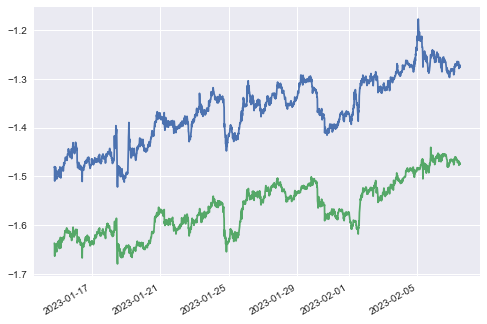

In [60]:
np.log(symbol1).plot()
np.log(symbol2).plot() #example of correlation of two symbols.


In [61]:
# make the necessary imports

from statsmodels.tsa.stattools import coint


In [62]:
data = cl

In [63]:
def find_cointegrated_pairs(data): #here we construct the cointegration function for many pairs.
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs

[('ETHUSDT', 'ETCUSDT'), ('PAXUSDT', 'ADAUSDT'), ('PAXUSDT', 'EOSUSDT'), ('PAXUSDT', 'HOTUSDT'), ('PAXUSDT', 'TFUELUSDT'), ('BATUSDT', 'BNBUSDT'), ('BATUSDT', 'BTTUSDT'), ('BATUSDT', 'ONEUSDT'), ('BATUSDT', 'ONTUSDT'), ('BATUSDT', 'HOTUSDT'), ('BATUSDT', 'ZRXUSDT'), ('BATUSDT', 'ICXUSDT'), ('BATUSDT', 'VENUSDT'), ('BATUSDT', 'FTMUSDT'), ('BATUSDT', 'BCCUSDT'), ('BATUSDT', 'QTUMUSDT'), ('BATUSDT', 'NANOUSDT'), ('MITHUSDT', 'WAVESUSDT'), ('MITHUSDT', 'TFUELUSDT'), ('MITHUSDT', 'TRXUSDT'), ('ADAUSDT', 'HOTUSDT'), ('ADAUSDT', 'TFUELUSDT'), ('IOSTUSDT', 'ZILUSDT'), ('IOSTUSDT', 'ZRXUSDT'), ('IOSTUSDT', 'ICXUSDT'), ('IOSTUSDT', 'NANOUSDT'), ('BNBUSDT', 'ONEUSDT'), ('BNBUSDT', 'ATOMUSDT'), ('BNBUSDT', 'LTCUSDT'), ('BNBUSDT', 'FTMUSDT'), ('BNBUSDT', 'BCCUSDT'), ('BNBUSDT', 'TRXUSDT'), ('BTTUSDT', 'TUSDUSDT'), ('BTTUSDT', 'ZILUSDT'), ('BTTUSDT', 'ONTUSDT'), ('BTTUSDT', 'HOTUSDT'), ('BTTUSDT', 'THETAUSDT'), ('BTTUSDT', 'ZRXUSDT'), ('BTTUSDT', 'WAVESUSDT'), ('BTTUSDT', 'VENUSDT'), ('BTTUSDT', 'BC

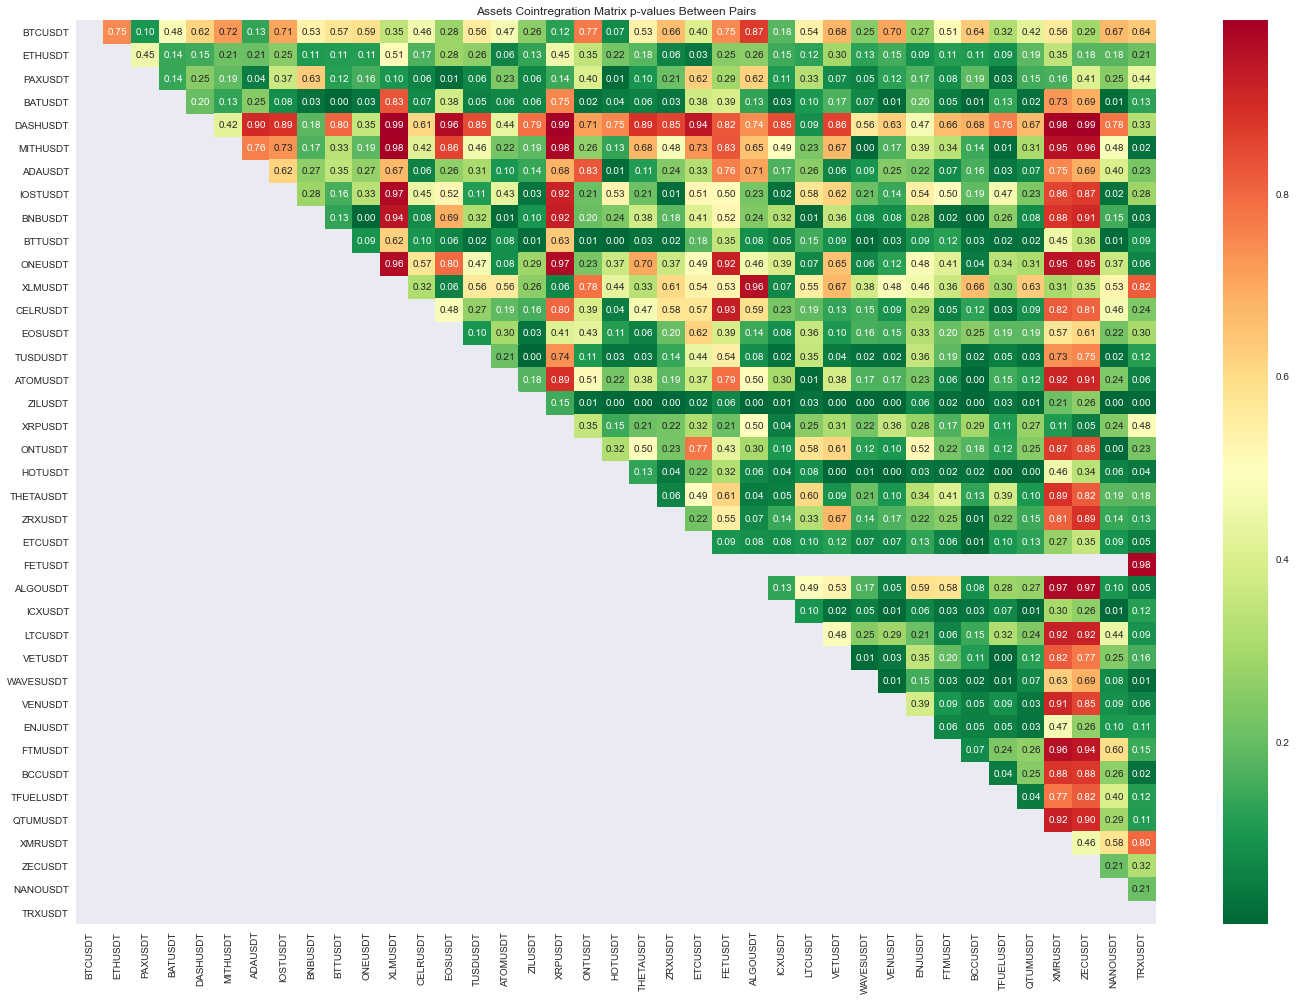

In [64]:
# calculate p-values and plot as a heatmap
pvalues, pairs = find_cointegrated_pairs(data)  
print(pairs)
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(pvalues, xticklabels = data.columns,
                yticklabels = data.columns, cmap = 'RdYlGn_r', annot = True, fmt=".2f",
                mask = (pvalues >= 0.99))
ax.set_title('Assets Cointregration Matrix p-values Between Pairs')
plt.tight_layout()
#plt.savefig('images/chart2', dpi=300)  plotting the cointegration matrix.